# Data Import & Cleaning

In [431]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as pp
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from scipy.stats.mstats import winsorize

## Data Import 

In [432]:
## Read data
#os.chdir("/content/drive/MyDrive/Colab Notebooks/Applied_Credit_Risk_Modeling/Applied_Credit_Risk")
folder = os.path.join(os.getcwd(), "Data/")
files = os.listdir(folder)

data_part1 = pd.read_csv(folder+files[0], delimiter='\t')
data_part2 = pd.read_csv(folder+files[1], delimiter='\t')
data_part3 = pd.read_csv(folder+files[2], delimiter='\t')
data_part4 = pd.read_csv(folder+files[3], delimiter='\t')

data_list = [data_part1, data_part2, data_part3, data_part4]
data = pd.concat(data_list)
data = data.reset_index(drop=True)
data.replace('nan',np.NaN)

data


C:\Users\Lorena Tassone\AppData\Local\Temp\ipykernel_29164\840003471.py:7: DtypeWarning: Columns (18,19,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data_part2 = pd.read_csv(folder+files[1], delimiter='\t')


,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16,0.00,36369.00,41.80,25,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17,0.00,20131.00,53.30,27,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13,0.00,11987.00,92.20,26,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6,0.00,5472.00,21.50,13,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13,0.00,24584.00,69.80,43,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000,60 months,10.99,217.38,licensed bankere,2 years,RENT,40000.00,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6,0.00,1990.00,34.30,23,w,INDIVIDUAL,0.00,0.00,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000,36 months,12.29,700.42,Agent,5 years,MORTGAGE,110000.00,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6,0.00,43263.00,95.70,8,f,INDIVIDUAL,1.00,0.00,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000,36 months,9.99,161.32,City Carrier,10+ years,RENT,56500.00,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15,0.00,32704.00,66.90,23,f,INDIVIDUAL,0.00,0.00,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000,60 months,15.31,503.02,"Gracon Services, Inc",10+ years,MORTGAGE,64000.00,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9,0.00,15704.00,53.80,20,f,INDIVIDUAL,5.00,0.00,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [433]:
## Handling wrong data

# Dropping distorted row (see below)
#data = data.drop(208166) # -> make this less static! (TBD) -> Collab
data = data.drop(109161) # -> make this less static! (TBD) -> VSCode

# Set type of numeric columns that weren't numeric
data["revol_util"] = pd.to_numeric(data["revol_util"])
data["total_acc"] = pd.to_numeric(data["total_acc"])
data["mort_acc"] = pd.to_numeric(data["mort_acc"])

# Get states for address
data['address'] = data['address'].str[-8:]

# settings to display all columns
pd.set_option("display.max_columns", None)

# show data
data
#data.sort_values('open_acc', ascending=False).head()

,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16,0.00,36369.00,41.80,25,w,INDIVIDUAL,0.00,0.00,OK 22690
1,8000,36 months,11.99,265.68,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17,0.00,20131.00,53.30,27,f,INDIVIDUAL,3.00,0.00,SD 05113
2,15600,36 months,10.49,506.97,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13,0.00,11987.00,92.20,26,f,INDIVIDUAL,0.00,0.00,WV 05113
3,7200,36 months,6.49,220.65,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6,0.00,5472.00,21.50,13,f,INDIVIDUAL,0.00,0.00,MA 00813
4,24375,60 months,17.27,609.33,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13,0.00,24584.00,69.80,43,f,INDIVIDUAL,1.00,0.00,VA 11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000,60 months,10.99,217.38,licensed bankere,2 years,RENT,40000.00,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6,0.00,1990.00,34.30,23,w,INDIVIDUAL,0.00,0.00,DC 30723
396026,21000,36 months,12.29,700.42,Agent,5 years,MORTGAGE,110000.00,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6,0.00,43263.00,95.70,8,f,INDIVIDUAL,1.00,0.00,LA 05113
396027,5000,36 months,9.99,161.32,City Carrier,10+ years,RENT,56500.00,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15,0.00,32704.00,66.90,23,f,INDIVIDUAL,0.00,0.00,NY 70466
396028,21000,60 months,15.31,503.02,"Gracon Services, Inc",10+ years,MORTGAGE,64000.00,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9,0.00,15704.00,53.80,20,f,INDIVIDUAL,5.00,0.00,FL 29597


Handling of data:
*   Index 109161 (VSC) [or 208166 in Collab] distorted data bcs field "title" included also "dti" and others (mistake in .txt file) -> removed from dataset
*   3 columns that should be numeric aren't. Hence datatype made numeric:
    *   revol_util
    *   total_acc
    *   mort_acc
*   annual_inc: 1x 0 -> dti 9999 -> how to handle? -> falls probably into outlieer

## Data Cleaning



### Summary Statistics (before)

In [434]:
# Data length and info
n_data = len(data)
print("Number of data points: "+str(n_data)+"\n")

data.info()


Number of data points: 396029

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396029 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396029 non-null  int64  
 1   term                  396029 non-null  object 
 2   int_rate              396029 non-null  float64
 3   installment           396029 non-null  float64
 4   emp_title             373102 non-null  object 
 5   emp_length            377728 non-null  object 
 6   home_ownership        396029 non-null  object 
 7   annual_inc            396029 non-null  float64
 8   verification_status   396029 non-null  object 
 9   issue_d               396029 non-null  object 
 10  loan_status           396029 non-null  object 
 11  purpose               396029 non-null  object 
 12  title                 394274 non-null  object 
 13  dti                   396029 non-null  float64
 14  earliest_cr_line     

In [435]:
# Splitting numerical and categorical variables
data_num = data.select_dtypes(include=['float64','int64'])
data_cat = data.select_dtypes(include=['object'])

In [436]:
# Summary for categorical data
data_cat.describe().T

,count,unique,top,freq
term,396029,2,36 months,302004
emp_title,373102,173104,Teacher,4389
emp_length,377728,11,10+ years,126040
home_ownership,396029,6,MORTGAGE,198347
verification_status,396029,3,Verified,139563
issue_d,396029,115,Oct-2014,14846
loan_status,396029,2,Fully Paid,318357
purpose,396029,14,debt_consolidation,234507
title,394274,48816,Debt consolidation,152472
earliest_cr_line,396029,684,Oct-2000,3017


In [437]:
# Summary for numerical data
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data_num.describe()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,395753.00,396029.00,358234.00,395494.00
mean,14113.90,13.64,431.85,74203.24,17.38,11.31,0.18,15844.56,53.79,25.41,1.81,0.12
std,8357.45,4.47,250.73,61637.69,18.02,5.14,0.53,20591.86,24.45,11.89,2.15,0.36
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,11.28,8.00,0.00,6025.00,35.80,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,40000.00,30.99,1533.81,8706582.00,9999.00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00


Possible Outliers:
*   dti -> income=0, credit_card, charged off



In [438]:
## Count NaN
# compute number of NaN values and percentage of NaN values for each column
nan_count = data.isna().sum()
nan_pct = data.isna().sum()/n_data

# create a new dataframe to store the results
nans = pd.DataFrame({'nan_count': nan_count, 'nan_pct': nan_pct})
nans["nan_pct_str"] = pd.Series(["{0:.2f}%".format(val * 100) for val in nans["nan_pct"]], index = nans.index)
nans

,nan_count,nan_pct,nan_pct_str
loan_amnt,0,0.00,0.00%
term,0,0.00,0.00%
int_rate,0,0.00,0.00%
installment,0,0.00,0.00%
emp_title,22927,0.06,5.79%
emp_length,18301,0.05,4.62%
home_ownership,0,0.00,0.00%
annual_inc,0,0.00,0.00%
verification_status,0,0.00,0.00%
issue_d,0,0.00,0.00%


In [439]:
# Value count for categorical data
vcs = dict()

for col in data_cat.columns:
    vc = data[col].value_counts().to_frame()
    vc["pct"] =  vc[col] / vc[col].sum()
    vc["pct"] = pd.Series(["{0:.2f}%".format(val * 100) for val in vc["pct"]], index = vc.index)
    vcs["vc {0}".format(col)] = vc
    display(vc)

,term,pct
36 months,302004,76.26%
60 months,94025,23.74%


,emp_title,pct
Teacher,4389,1.18%
Manager,4250,1.14%
Registered Nurse,1856,0.50%
RN,1846,0.49%
Supervisor,1830,0.49%
...,...,...
Postman,1,0.00%
"McCarthy & Holthus, LLC",1,0.00%
jp flooring,1,0.00%
Histology Technologist,1,0.00%


,emp_length,pct
10+ years,126040,33.37%
2 years,35827,9.48%
< 1 year,31725,8.40%
3 years,31665,8.38%
5 years,26495,7.01%
1 year,25882,6.85%
4 years,23952,6.34%
6 years,20841,5.52%
7 years,20819,5.51%
8 years,19168,5.07%


,home_ownership,pct
MORTGAGE,198347,50.08%
RENT,159790,40.35%
OWN,37746,9.53%
OTHER,112,0.03%
NONE,31,0.01%
ANY,3,0.00%


,verification_status,pct
Verified,139563,35.24%
Source Verified,131385,33.18%
Not Verified,125081,31.58%


,issue_d,pct
Oct-2014,14846,3.75%
Jul-2014,12609,3.18%
Jan-2015,11705,2.96%
Dec-2013,10618,2.68%
Nov-2013,10496,2.65%
...,...,...
Jul-2007,26,0.01%
Sep-2008,25,0.01%
Nov-2007,22,0.01%
Sep-2007,15,0.00%


,loan_status,pct
Fully Paid,318357,80.39%
Charged Off,77672,19.61%


,purpose,pct
debt_consolidation,234507,59.21%
credit_card,83019,20.96%
home_improvement,24029,6.07%
other,21185,5.35%
major_purchase,8790,2.22%
small_business,5701,1.44%
car,4697,1.19%
medical,4196,1.06%
moving,2854,0.72%
vacation,2452,0.62%


,title,pct
Debt consolidation,152472,38.67%
Credit card refinancing,51487,13.06%
Home improvement,15264,3.87%
Other,12930,3.28%
Debt Consolidation,11608,2.94%
...,...,...
Daughter's Wedding Bill,1,0.00%
gotta move,1,0.00%
creditcardrefi,1,0.00%
Debt/Home,1,0.00%


,earliest_cr_line,pct
Oct-2000,3017,0.76%
Aug-2000,2935,0.74%
Oct-2001,2896,0.73%
Aug-2001,2884,0.73%
Nov-2000,2736,0.69%
...,...,...
Jul-1958,1,0.00%
Nov-1957,1,0.00%
Jan-1953,1,0.00%
Jul-1955,1,0.00%


,initial_list_status,pct
f,238065,60.11%
w,157964,39.89%


,application_type,pct
INDIVIDUAL,395318,99.82%
JOINT,425,0.11%
DIRECT_PAY,286,0.07%


,address,pct
AP 70466,2169,0.55%
AE 22690,2110,0.53%
AP 22690,2091,0.53%
AE 48052,2026,0.51%
AE 30723,2018,0.51%
...,...,...
NH 86630,167,0.04%
NC 93700,167,0.04%
NM 11650,166,0.04%
UT 86630,163,0.04%


**Target Variable**

In [440]:
# Change target variable to dummy
data['loan_status'] = data['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})
data

,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,0,vacation,Vacation,26.24,Jun-1990,16,0.00,36369.00,41.80,25,w,INDIVIDUAL,0.00,0.00,OK 22690
1,8000,36 months,11.99,265.68,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,0,debt_consolidation,Debt consolidation,22.05,Jul-2004,17,0.00,20131.00,53.30,27,f,INDIVIDUAL,3.00,0.00,SD 05113
2,15600,36 months,10.49,506.97,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,0,credit_card,Credit card refinancing,12.79,Aug-2007,13,0.00,11987.00,92.20,26,f,INDIVIDUAL,0.00,0.00,WV 05113
3,7200,36 months,6.49,220.65,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,0,credit_card,Credit card refinancing,2.60,Sep-2006,6,0.00,5472.00,21.50,13,f,INDIVIDUAL,0.00,0.00,MA 00813
4,24375,60 months,17.27,609.33,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,1,credit_card,Credit Card Refinance,33.95,Mar-1999,13,0.00,24584.00,69.80,43,f,INDIVIDUAL,1.00,0.00,VA 11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000,60 months,10.99,217.38,licensed bankere,2 years,RENT,40000.00,Source Verified,Oct-2015,0,debt_consolidation,Debt consolidation,15.63,Nov-2004,6,0.00,1990.00,34.30,23,w,INDIVIDUAL,0.00,0.00,DC 30723
396026,21000,36 months,12.29,700.42,Agent,5 years,MORTGAGE,110000.00,Source Verified,Feb-2015,0,debt_consolidation,Debt consolidation,21.45,Feb-2006,6,0.00,43263.00,95.70,8,f,INDIVIDUAL,1.00,0.00,LA 05113
396027,5000,36 months,9.99,161.32,City Carrier,10+ years,RENT,56500.00,Verified,Oct-2013,0,debt_consolidation,pay off credit cards,17.56,Mar-1997,15,0.00,32704.00,66.90,23,f,INDIVIDUAL,0.00,0.00,NY 70466
396028,21000,60 months,15.31,503.02,"Gracon Services, Inc",10+ years,MORTGAGE,64000.00,Verified,Aug-2012,0,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9,0.00,15704.00,53.80,20,f,INDIVIDUAL,5.00,0.00,FL 29597


,loan_status,pct
0,318357,80.39%
1,77672,19.61%


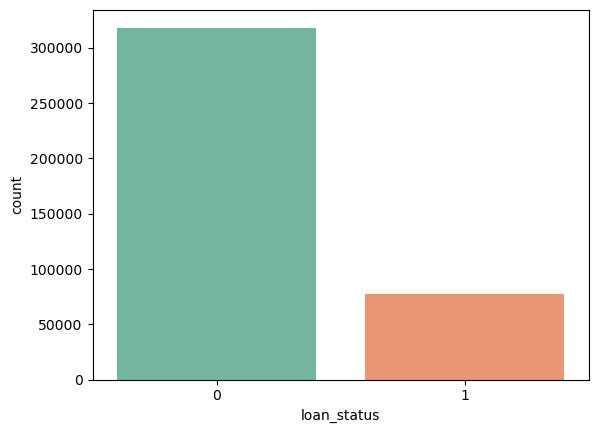

loan_status             1.00
int_rate                0.25
revol_util              0.08
dti                     0.06
loan_amnt               0.06
installment             0.04
open_acc                0.03
pub_rec                 0.02
pub_rec_bankruptcies    0.01
revol_bal              -0.01
total_acc              -0.02
annual_inc             -0.05
mort_acc               -0.07
dtype: float64

In [441]:
# Value count loan_status
vc_loanstatus = data["loan_status"].value_counts().to_frame()
vc_loanstatus["pct"] =  vc_loanstatus["loan_status"] / vc_loanstatus["loan_status"].sum()
vc_loanstatus["pct"] = pd.Series(["{0:.2f}%".format(val * 100) for val in vc_loanstatus["pct"]], index = vc_loanstatus.index)
display(vc_loanstatus)

# Plotting loan_status
sns.countplot(x=data["loan_status"], palette = "Set2")
plt.xticks(rotation=0)
plt.show()

# Correlation of variables with loan_status
cor_target = data.corrwith(data["loan_status"])
cor_target.sort_values(axis = 0, ascending = False)

### Useless Variables
*   Paper: If train/test split 70/30 -> don’t use variables having >= 30% missing values -> we could do that 
*   Dropping useless variables: 
    *  title
    * emp_title (maybe?) -> annual_inc might be correlated and more important
    * address (maybe?) -> irrelevant?
    * earliest_cr_line & issue_d -> relevant but just dropped to try OHE -> maybe just use year?
* Add/Create variables?



In [442]:
# Dropping useless variables
data_cleand = data.drop(['title','emp_title','address', 'earliest_cr_line', 'issue_d'], axis=1)

# Dropping variables having more than train_ratio% of nan values
train_ratio = 0.7
test_ratio = 0.3
data_cleand = data_cleand.loc[:, nans["nan_pct"] <= test_ratio]
data_cleand


,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000,36 months,11.44,329.48,10+ years,RENT,117000.00,Not Verified,0,vacation,26.24,16,0.00,36369.00,41.80,25,w,INDIVIDUAL,0.00,0.00
1,8000,36 months,11.99,265.68,4 years,MORTGAGE,65000.00,Not Verified,0,debt_consolidation,22.05,17,0.00,20131.00,53.30,27,f,INDIVIDUAL,3.00,0.00
2,15600,36 months,10.49,506.97,< 1 year,RENT,43057.00,Source Verified,0,credit_card,12.79,13,0.00,11987.00,92.20,26,f,INDIVIDUAL,0.00,0.00
3,7200,36 months,6.49,220.65,6 years,RENT,54000.00,Not Verified,0,credit_card,2.60,6,0.00,5472.00,21.50,13,f,INDIVIDUAL,0.00,0.00
4,24375,60 months,17.27,609.33,9 years,MORTGAGE,55000.00,Verified,1,credit_card,33.95,13,0.00,24584.00,69.80,43,f,INDIVIDUAL,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000,60 months,10.99,217.38,2 years,RENT,40000.00,Source Verified,0,debt_consolidation,15.63,6,0.00,1990.00,34.30,23,w,INDIVIDUAL,0.00,0.00
396026,21000,36 months,12.29,700.42,5 years,MORTGAGE,110000.00,Source Verified,0,debt_consolidation,21.45,6,0.00,43263.00,95.70,8,f,INDIVIDUAL,1.00,0.00
396027,5000,36 months,9.99,161.32,10+ years,RENT,56500.00,Verified,0,debt_consolidation,17.56,15,0.00,32704.00,66.90,23,f,INDIVIDUAL,0.00,0.00
396028,21000,60 months,15.31,503.02,10+ years,MORTGAGE,64000.00,Verified,0,debt_consolidation,15.88,9,0.00,15704.00,53.80,20,f,INDIVIDUAL,5.00,0.00


In [443]:
# Splitting numerical and categorical variables
data_num_clean = data_cleand.select_dtypes(include=['float64','int64'])
data_cat_clean = data_cleand.select_dtypes(include=['object'])

### Data Visualizations 
* Distribution
* Boxplot

To visualize outliers and show in presentation
-> then outliers removed or winsorized


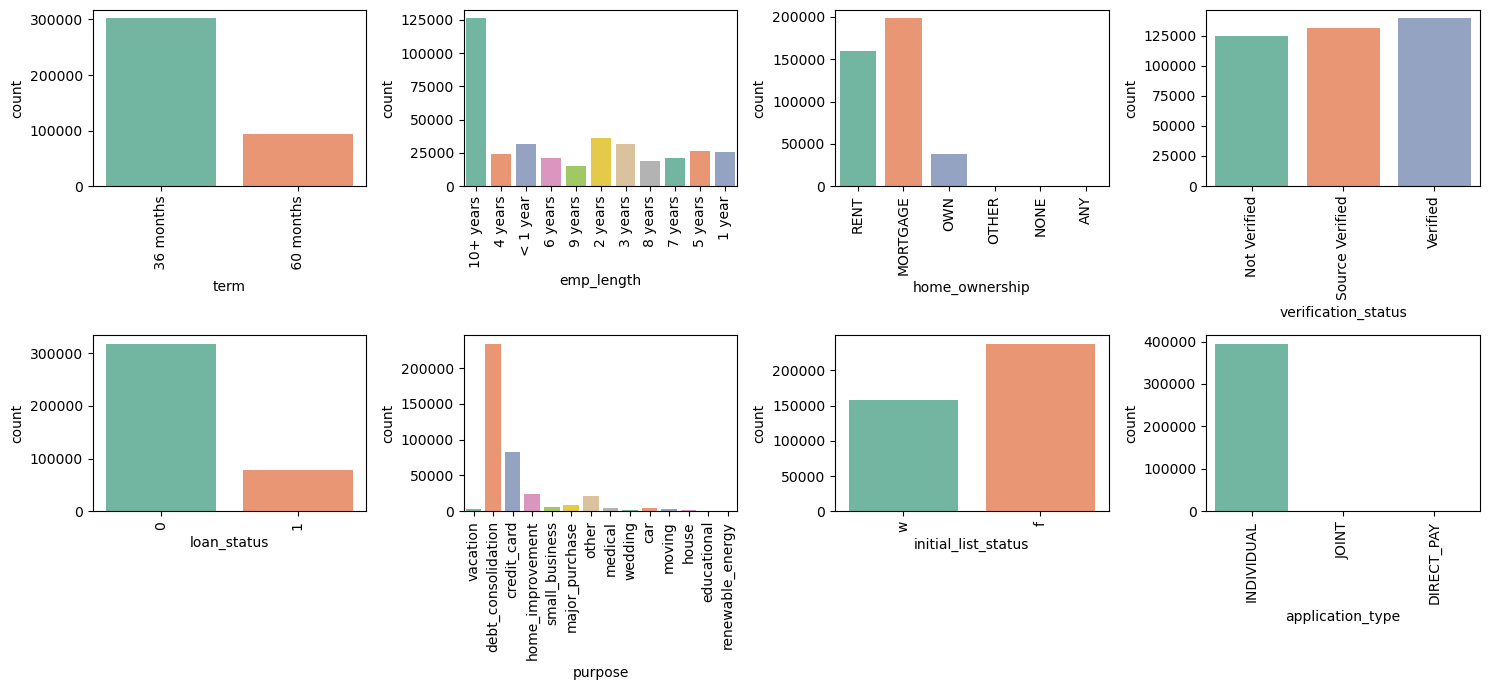

In [444]:
## Plotting Distribution for non-numeric data (only those that don't have many categories)

dist_nn = ["term", "emp_length", "home_ownership", "verification_status", "loan_status", "purpose", "initial_list_status", "application_type"]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7), sharex = False, sharey = False)
axes = axes.ravel()  

for col, ax in zip(dist_nn, axes): 
    # absolute
    sns.countplot(data=data_cleand, x=col, palette = "Set2", ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
fig.tight_layout()
plt.show()

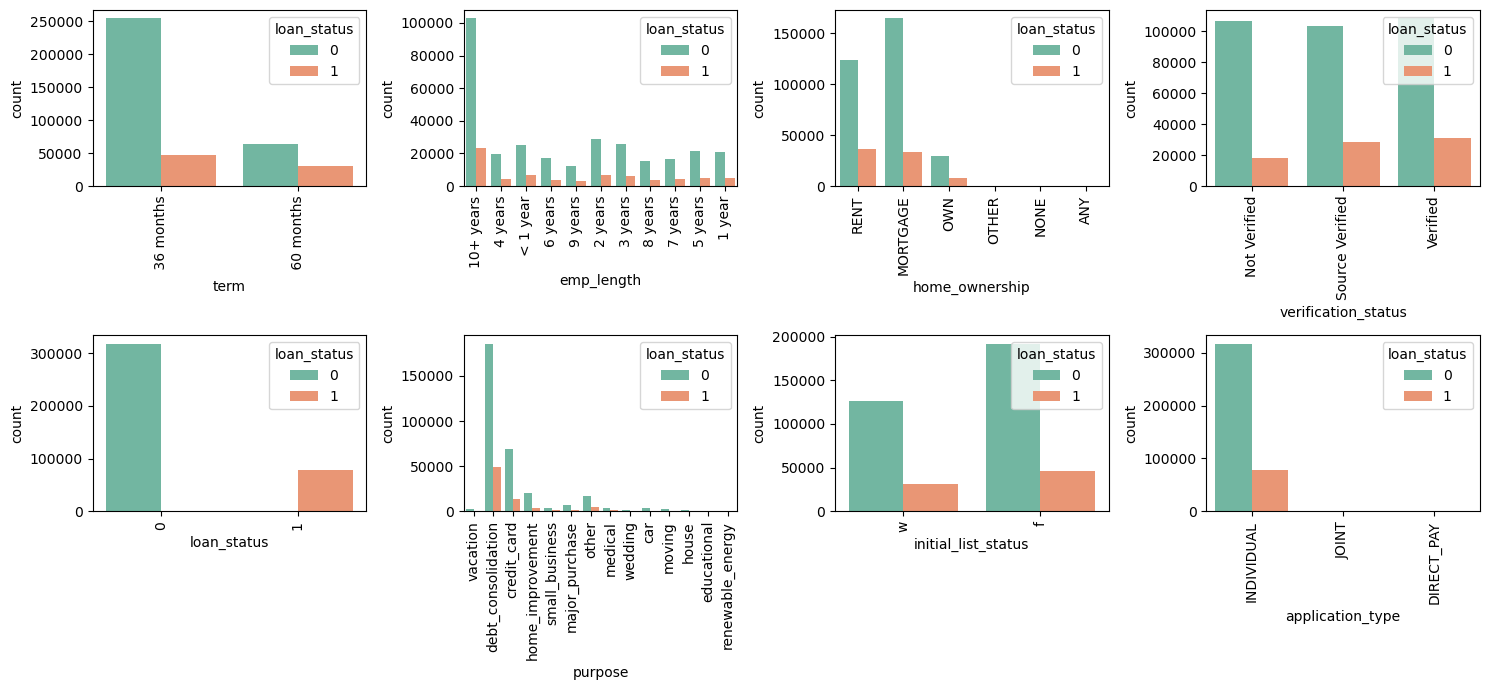

In [445]:
## Plotting Distribution for non-numeric data (only those that don't have many categories)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7), sharex = False, sharey = False)
axes = axes.ravel()  

for col, ax in zip(dist_nn, axes): 
    # default vs non-default
    sns.countplot(data=data_cleand, x=col, hue="loan_status", palette='Set2', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
fig.tight_layout()
plt.show()



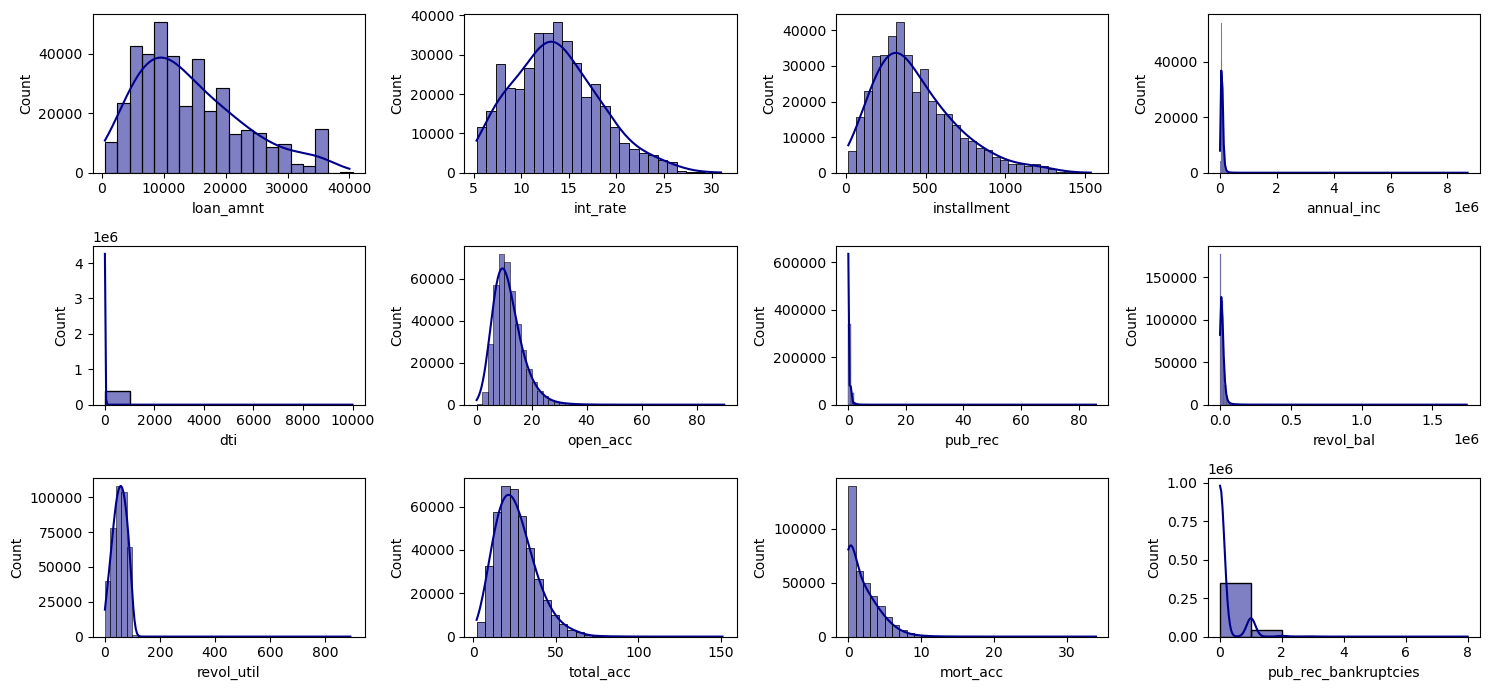

In [446]:
## Plotting Distribution for numeric data

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 7))

# loan_amnt -> right/positive skewed
sns.histplot(data=data_cleand, x="loan_amnt", binwidth=2000, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[0,0])
# int_rate -> right/positive skewed
sns.histplot(data=data_cleand, x="int_rate", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[0,1])
# installment -> right/positive skewed
sns.histplot(data=data_cleand, x="installment", binwidth=50, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[0,2])
# annual_inc -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=data_cleand, x="annual_inc", binwidth=10000, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[0,3])
# dti -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=data_cleand, x="dti", binwidth=1000, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[1,0])
# open_acc -> right/positive skewed
sns.histplot(data=data_cleand, x="open_acc", binwidth=2, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[1,1])
# pub_rec -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=data_cleand, x="pub_rec", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[1,2])
# revol_bal -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=data_cleand, x="revol_bal", binwidth=10000, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[1,3])
# revol_util -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=data_cleand, x="revol_util", binwidth=20, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[2,0])
# total_acc -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=data_cleand, x="total_acc", binwidth=5, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[2,1])
# mort_acc -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=data_cleand, x="mort_acc", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[2,2])
# pub_rec_bankruptcies
sns.histplot(data=data_cleand, x="pub_rec_bankruptcies", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[2,3])

fig.tight_layout()
plt.show()



C:\Users\Lorena Tassone\AppData\Local\Temp\ipykernel_29164\3575642439.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=d, x=col, shade=True, ax=ax)
C:\Users\Lorena Tassone\AppData\Local\Temp\ipykernel_29164\3575642439.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=d, x=col, shade=True, ax=ax)
C:\Users\Lorena Tassone\AppData\Local\Temp\ipykernel_29164\3575642439.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=d, x=col, shade=True, ax=ax)
C:\Users\Lorena Tassone\AppData\Local\Temp\ipykernel_29164\3575642439.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.


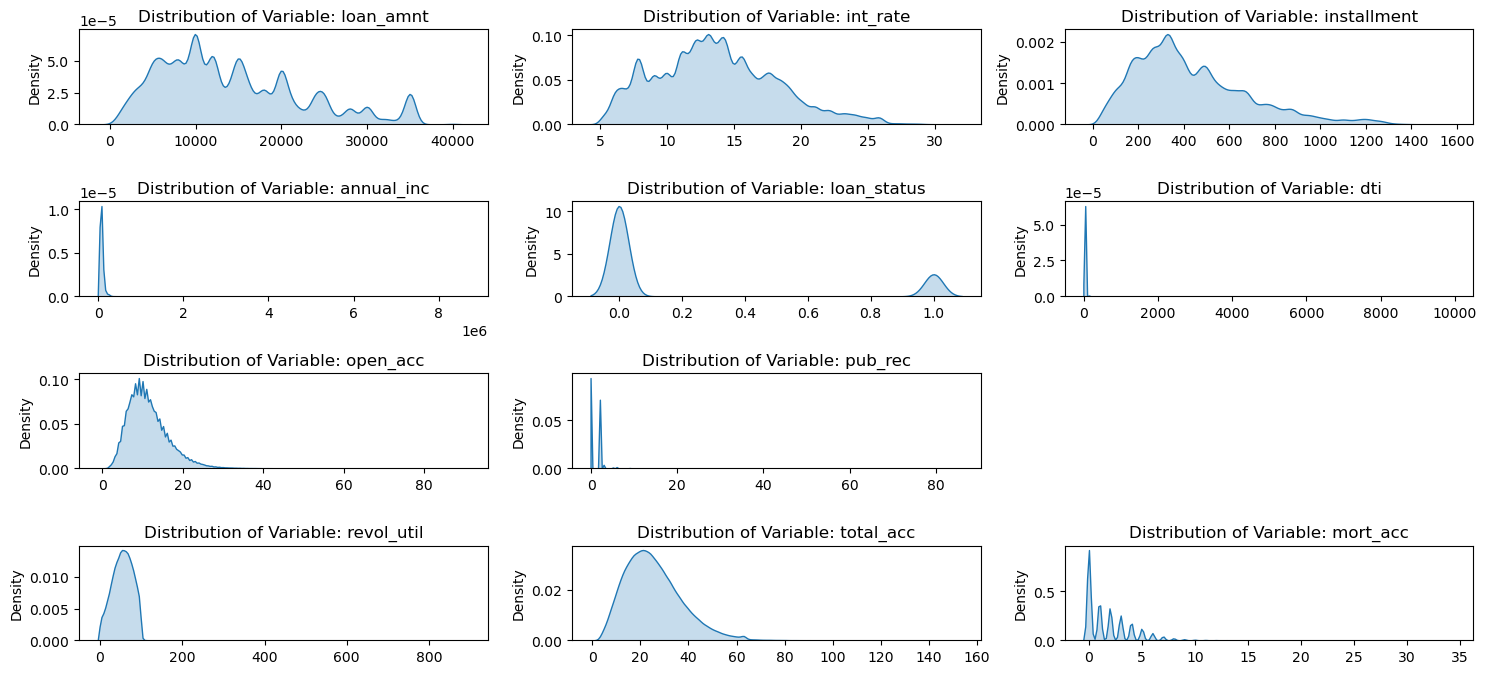

In [447]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 7), sharex = False, sharey = False)
axes = axes.ravel()  
cols = data_num_clean.columns[:]

for col, ax in zip(cols, axes):
    d = data_num_clean 
    sns.kdeplot(data=d, x=col, shade=True, ax=ax)
    ax.set(title=f'Distribution of Variable: {col}', xlabel=None)
    
fig.delaxes(axes[8])
fig.tight_layout()
plt.show()

In [448]:
data_num_clean.skew()

loan_amnt                0.78
int_rate                 0.42
installment              0.98
annual_inc              41.04
loan_status              1.53
dti                    431.05
open_acc                 1.21
pub_rec                 16.58
revol_bal               11.73
revol_util              -0.07
total_acc                0.86
mort_acc                 1.60
pub_rec_bankruptcies     3.42
dtype: float64

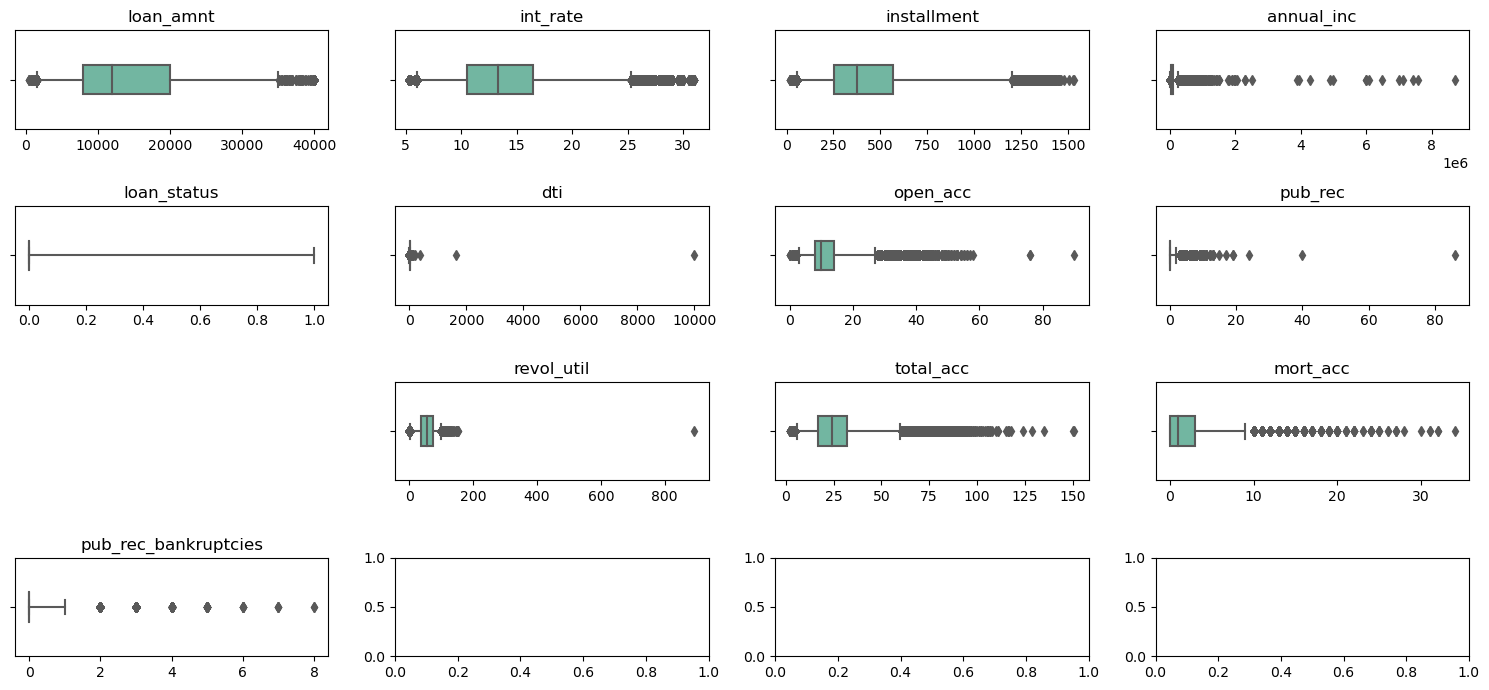

In [449]:
## Boxplot for numeric data

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 7), sharex = False, sharey = False)
axes = axes.ravel()  
cols = data_num_clean.columns[:]

for col, ax in zip(cols, axes):
  d = data_num_clean 
  sns.boxplot(data=d, x=col, orient = "h", palette = "Set2", width=0.3, whis=[1, 99], ax=ax) # Show the 1st and 99th percentiles
  ax.set(title=col, xlabel=None)

    
fig.delaxes(axes[8])
fig.tight_layout()
plt.show()

In [450]:
## Boxplot for numeric data

# for col in data_cleand.select_dtypes(include=['float64', 'int64']).columns:
#   sns.boxplot(data = data_cleand[[col]], orient = "h", palette = "Set2", width=0.2, whis=[1, 99])
#   plt.show()


### Missing and wrong values 
* Wrong row was already deleted. 
* Numeric NaN values: Replacing nan values with column means
* Non-numeric NaN values: Replacing nan values with category that has highes value count? (TBD)

In [451]:
## Numeric data: Replacing nan values with column means 
for col in data_cleand.select_dtypes(include=['float64', 'int64']).columns:
    data_cleand[col] = data_cleand[col].fillna(data_cleand[col].mean())


## Non-Numeric data: Replacing nan values with category that has highes value count? (emp_title, emp_length, title)

# loop through each column and replace NaN with mode
for col in data_cleand.select_dtypes(include=['object']).columns:
        mode = data_cleand[col].mode()[0]                   # get mode of column
        data_cleand[col] = data_cleand[col].fillna(mode)    # fill NaN with mode value

data_cleand

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000,36 months,11.44,329.48,10+ years,RENT,117000.00,Not Verified,0,vacation,26.24,16,0.00,36369.00,41.80,25,w,INDIVIDUAL,0.00,0.00
1,8000,36 months,11.99,265.68,4 years,MORTGAGE,65000.00,Not Verified,0,debt_consolidation,22.05,17,0.00,20131.00,53.30,27,f,INDIVIDUAL,3.00,0.00
2,15600,36 months,10.49,506.97,< 1 year,RENT,43057.00,Source Verified,0,credit_card,12.79,13,0.00,11987.00,92.20,26,f,INDIVIDUAL,0.00,0.00
3,7200,36 months,6.49,220.65,6 years,RENT,54000.00,Not Verified,0,credit_card,2.60,6,0.00,5472.00,21.50,13,f,INDIVIDUAL,0.00,0.00
4,24375,60 months,17.27,609.33,9 years,MORTGAGE,55000.00,Verified,1,credit_card,33.95,13,0.00,24584.00,69.80,43,f,INDIVIDUAL,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000,60 months,10.99,217.38,2 years,RENT,40000.00,Source Verified,0,debt_consolidation,15.63,6,0.00,1990.00,34.30,23,w,INDIVIDUAL,0.00,0.00
396026,21000,36 months,12.29,700.42,5 years,MORTGAGE,110000.00,Source Verified,0,debt_consolidation,21.45,6,0.00,43263.00,95.70,8,f,INDIVIDUAL,1.00,0.00
396027,5000,36 months,9.99,161.32,10+ years,RENT,56500.00,Verified,0,debt_consolidation,17.56,15,0.00,32704.00,66.90,23,f,INDIVIDUAL,0.00,0.00
396028,21000,60 months,15.31,503.02,10+ years,MORTGAGE,64000.00,Verified,0,debt_consolidation,15.88,9,0.00,15704.00,53.80,20,f,INDIVIDUAL,5.00,0.00


In [452]:
## Count NaN again
# compute number of NaN values and percentage of NaN values for each column
nan_count2 = data_cleand.isna().sum()
nan_pct2 = data_cleand.isna().sum()/n_data

# create a new dataframe to store the results
nans2 = pd.DataFrame({'nan_count': nan_count2, 'nan_pct': nan_pct2})
nans2["nan_pct_str"] = pd.Series(["{0:.2f}%".format(val * 100) for val in nans2["nan_pct"]], index = nans2.index)
nans2

,nan_count,nan_pct,nan_pct_str
loan_amnt,0,0.00,0.00%
term,0,0.00,0.00%
int_rate,0,0.00,0.00%
installment,0,0.00,0.00%
emp_length,0,0.00,0.00%
home_ownership,0,0.00,0.00%
annual_inc,0,0.00,0.00%
verification_status,0,0.00,0.00%
loan_status,0,0.00,0.00%
purpose,0,0.00,0.00%


In [453]:
describe2 = data_cleand.describe()
describe2.loc['dtype'] = data_cleand.dtypes

describe2

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00
mean,14113.90,13.64,431.85,74203.24,0.20,17.38,11.31,0.18,15844.56,53.79,25.41,1.81,0.12
std,8357.45,4.47,250.73,61637.69,0.40,18.02,5.14,0.53,20591.86,24.44,11.89,2.04,0.36
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,0.00,11.28,8.00,0.00,6025.00,35.90,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,0.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,0.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,40000.00,30.99,1533.81,8706582.00,1.00,9999.00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00
dtype,int64,float64,float64,float64,int64,float64,int64,float64,float64,float64,int64,float64,float64


In [454]:
# Separating numerical and categorical data
data_num_final = data_cleand.select_dtypes(include=['float64','int64'])
data_cat_final = data_cleand.select_dtypes(include=['object'])

### Outliers (TBD)




**Outlier Detection:** https://www.freecodecamp.org/news/how-to-detect-outliers-in-machine-learning/ 

**Outlier Handling:** https://heartbeat.comet.ml/how-to-make-your-machine-learning-models-robust-to-outliers-44d404067d07 

* Try out different methods?

* Delete outliers or winsorize them \
-> Reduces sensitivity of model to outliers 

In [455]:
# Set mode for outlier treatment

# outlier_mode = "wins" # wins, transf, drop

# if outlier_mode == "wins":

# elif outlier_mode == "transf":

# elif outlier_mode == "drop":

In [456]:
data_num_final.skew()

loan_amnt                0.78
int_rate                 0.42
installment              0.98
annual_inc              41.04
loan_status              1.53
dti                    431.05
open_acc                 1.21
pub_rec                 16.58
revol_bal               11.73
revol_util              -0.07
total_acc                0.86
mort_acc                 1.68
pub_rec_bankruptcies     3.43
dtype: float64

#### Winsorization
For example, a 90% winsorization sets all observations greater than the 95th percentile equal to the value at the 95th percentile and all observations less than the 5th percentile equal to the value at the 5th percentile. \
-> If no extreme outliers are present, winsorization may be unnecessary \
-> one-sided here?

https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0

In [457]:
## Winsorization (if extreme outliers)

data_temp = data_cleand
data_cleaned_win = data_cleand.copy(deep=True)

num_col_list = data_num_final.columns.to_list()
num_col_list.remove("loan_status")


# Winsorize on right-tail
for col in num_col_list:
    data_cleaned_win[col] = winsorize(data_temp[col], limits=(0, 0.01))

data_cleaned_win.describe()


c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Lorena Tassone\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00,396029.00
mean,14111.29,13.63,431.30,72904.52,0.20,17.33,11.26,0.17,15186.24,53.77,25.35,1.79,0.11
std,8350.21,4.44,248.95,40490.15,0.40,8.07,4.94,0.42,14155.26,24.36,11.64,1.94,0.32
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,0.00,11.28,8.00,0.00,6025.00,35.90,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,0.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,0.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,35000.00,25.28,1202.46,250000.00,1.00,36.43,27.00,2.00,86046.00,98.00,60.00,8.00,1.00


In [458]:
data_cleaned_win.skew()

C:\Users\Lorena Tassone\AppData\Local\Temp\ipykernel_29164\2771197466.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_cleaned_win.skew()


loan_amnt               0.77
int_rate                0.38
installment             0.94
annual_inc              1.74
loan_status             1.53
dti                     0.21
open_acc                0.87
pub_rec                 2.56
revol_bal               2.34
revol_util             -0.18
total_acc               0.69
mort_acc                1.19
pub_rec_bankruptcies    2.43
dtype: float64

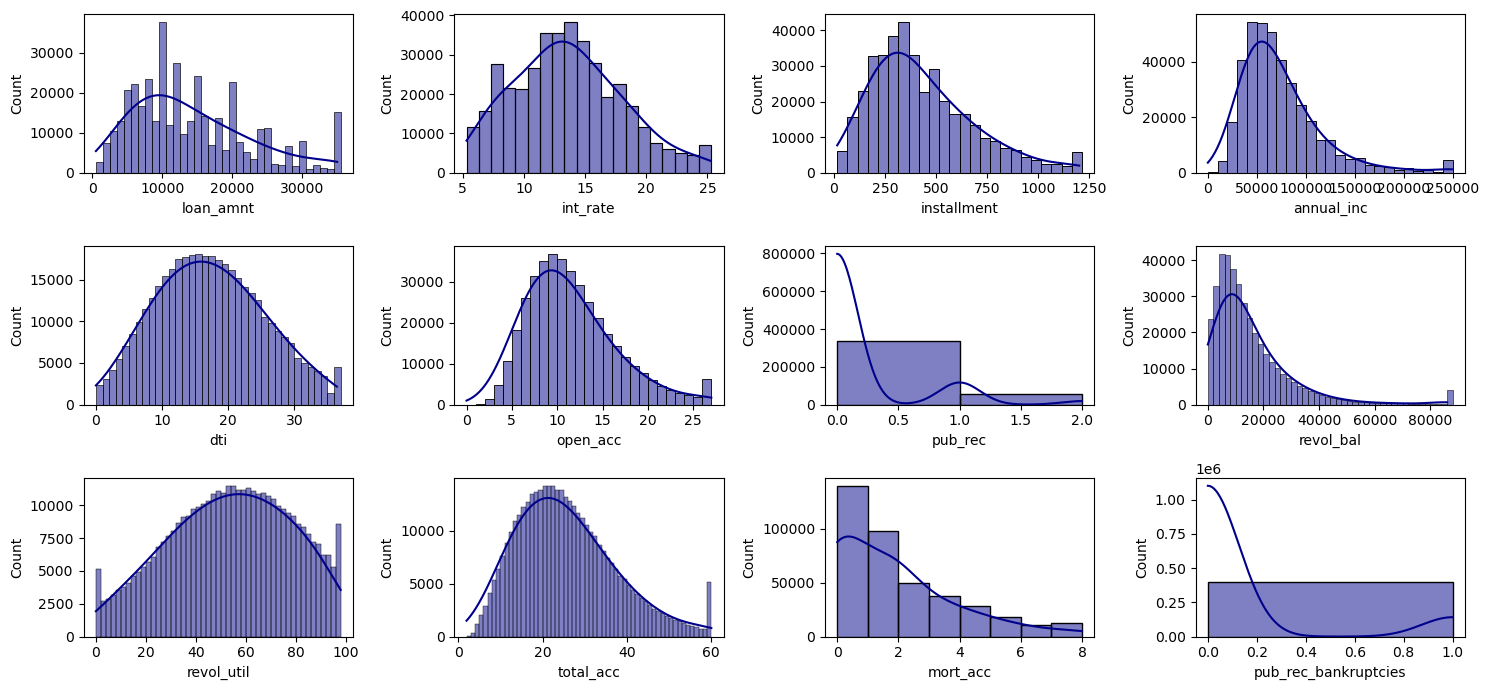

In [459]:
## Plotting Distribution for numeric data

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 7))

d = data_cleaned_win

# loan_amnt -> right/positive skewed
sns.histplot(data=d, x="loan_amnt", binwidth=1000, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[0,0])
# int_rate -> right/positive skewed
sns.histplot(data=d, x="int_rate", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[0,1])
# installment -> right/positive skewed
sns.histplot(data=d, x="installment", binwidth=50, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[0,2])
# annual_inc -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=d, x="annual_inc", binwidth=10000, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[0,3])
# dti -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=d, x="dti", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[1,0])
# open_acc -> right/positive skewed
sns.histplot(data=d, x="open_acc", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[1,1])
# pub_rec -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=d, x="pub_rec", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[1,2])
# revol_bal -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=d, x="revol_bal", binwidth=2000, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[1,3])
# revol_util -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=d, x="revol_util", binwidth=2, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[2,0])
# total_acc -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=d, x="total_acc", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[2,1])
# mort_acc -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=d, x="mort_acc", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[2,2])
# pub_rec_bankruptcies
sns.histplot(data=d, x="pub_rec_bankruptcies", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[2,3])

fig.tight_layout()
plt.show()

C:\Users\Lorena Tassone\AppData\Local\Temp\ipykernel_29164\1866747091.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=d, x=col, shade=True, ax=ax)
C:\Users\Lorena Tassone\AppData\Local\Temp\ipykernel_29164\1866747091.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=d, x=col, shade=True, ax=ax)
C:\Users\Lorena Tassone\AppData\Local\Temp\ipykernel_29164\1866747091.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=d, x=col, shade=True, ax=ax)
C:\Users\Lorena Tassone\AppData\Local\Temp\ipykernel_29164\1866747091.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.


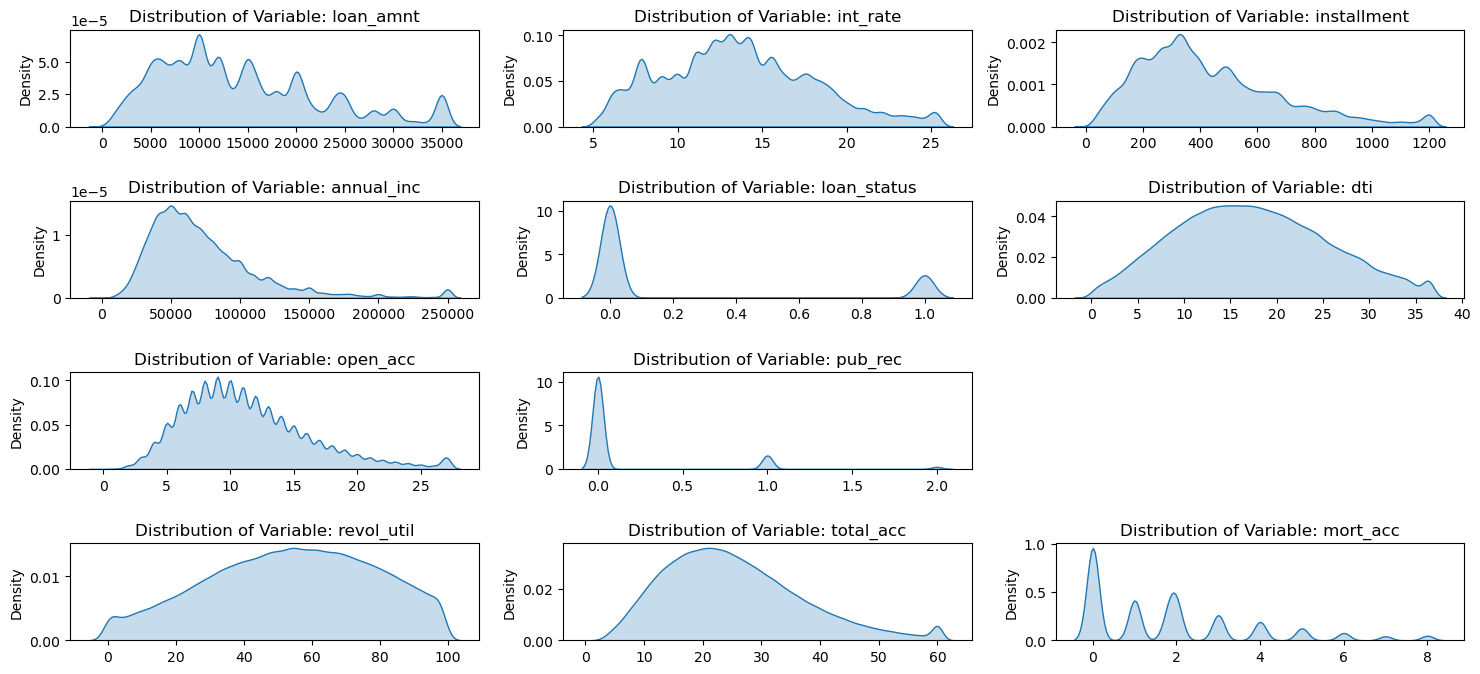

In [460]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 7), sharex = False, sharey = False)
axes = axes.ravel()  
cols = data_cleaned_win.select_dtypes(include=['float64', 'int64']).columns[:]

for col, ax in zip(cols, axes):
    d = data_cleaned_win.select_dtypes(include=['float64', 'int64'])
    sns.kdeplot(data=d, x=col, shade=True, ax=ax)
    ax.set(title=f'Distribution of Variable: {col}', xlabel=None)
    
fig.delaxes(axes[8])
fig.tight_layout()
plt.show()

#### Log-Scale Transformation to detect outliers

In [461]:
## Log-Scale Transformation (often preferred when the response variable follows exponential distribution or is right-skewed)

#### Outlier Removal

**Using the Interquartile Range (IQR)**

In [462]:
# Get numerical variable names
num_col_list = data_num_final.columns.to_list()
num_col_list.remove("loan_status")
num_col_list

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

In [463]:
data_cleaned_iqr = data_cleand

upper_limits_iqr = {}
lower_limits_iqr = {}

for col in num_col_list:

    print("\n", col, ":")

    percentile_25 = data_cleand[col].quantile(0.25)
    percentile_75 = data_cleand[col].quantile(0.75)

    print("25 percentile: ", percentile_25)
    print("75 percentile: ", percentile_75)  

    iqr = percentile_75 - percentile_25
    print("IQR: ", iqr)

    upper_limit = percentile_75 + 1.5 * iqr
    lower_limit = percentile_25 - 1.5 * iqr

    upper_limits_iqr[col] = upper_limit
    lower_limits_iqr[col] = lower_limit

    print("Upper limit: ", upper_limit)   
    print("Lower limit: ", lower_limit)

for col in num_col_list:  
    #data_test_iqr = data_test_iqr[(data_test_iqr[col] > lower_limits_iqr[col]) & (data_test_iqr[col] < upper_limits_iqr[col])]
    data_cleaned_iqr = data_cleaned_iqr[(data_cleaned_iqr[col] < upper_limits_iqr[col])]

print("\n")
print("Old Shape: ", data_cleand.shape)
print("New Shape: ", data_cleaned_iqr.shape)

diff = len(data_cleand) - len(data_cleaned_iqr)
print("Size difference: ", diff)
data_cleaned_iqr



 loan_amnt :
25 percentile:  8000.0
75 percentile:  20000.0
IQR:  12000.0
Upper limit:  38000.0
Lower limit:  -10000.0

 int_rate :
25 percentile:  10.49
75 percentile:  16.49
IQR:  5.999999999999998
Upper limit:  25.489999999999995
Lower limit:  1.4900000000000038

 installment :
25 percentile:  250.33
75 percentile:  567.3
IQR:  316.9699999999999
Upper limit:  1042.7549999999999
Lower limit:  -225.12499999999986

 annual_inc :
25 percentile:  45000.0
75 percentile:  90000.0
IQR:  45000.0
Upper limit:  157500.0
Lower limit:  -22500.0

 dti :
25 percentile:  11.28
75 percentile:  22.98
IQR:  11.700000000000001
Upper limit:  40.53
Lower limit:  -6.270000000000001

 open_acc :
25 percentile:  8.0
75 percentile:  14.0
IQR:  6.0
Upper limit:  23.0
Lower limit:  -1.0

 pub_rec :
25 percentile:  0.0
75 percentile:  0.0
IQR:  0.0
Upper limit:  0.0
Lower limit:  0.0

 revol_bal :
25 percentile:  6025.0
75 percentile:  19620.0
IQR:  13595.0
Upper limit:  40012.5
Lower limit:  -14367.5

 revol_

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies


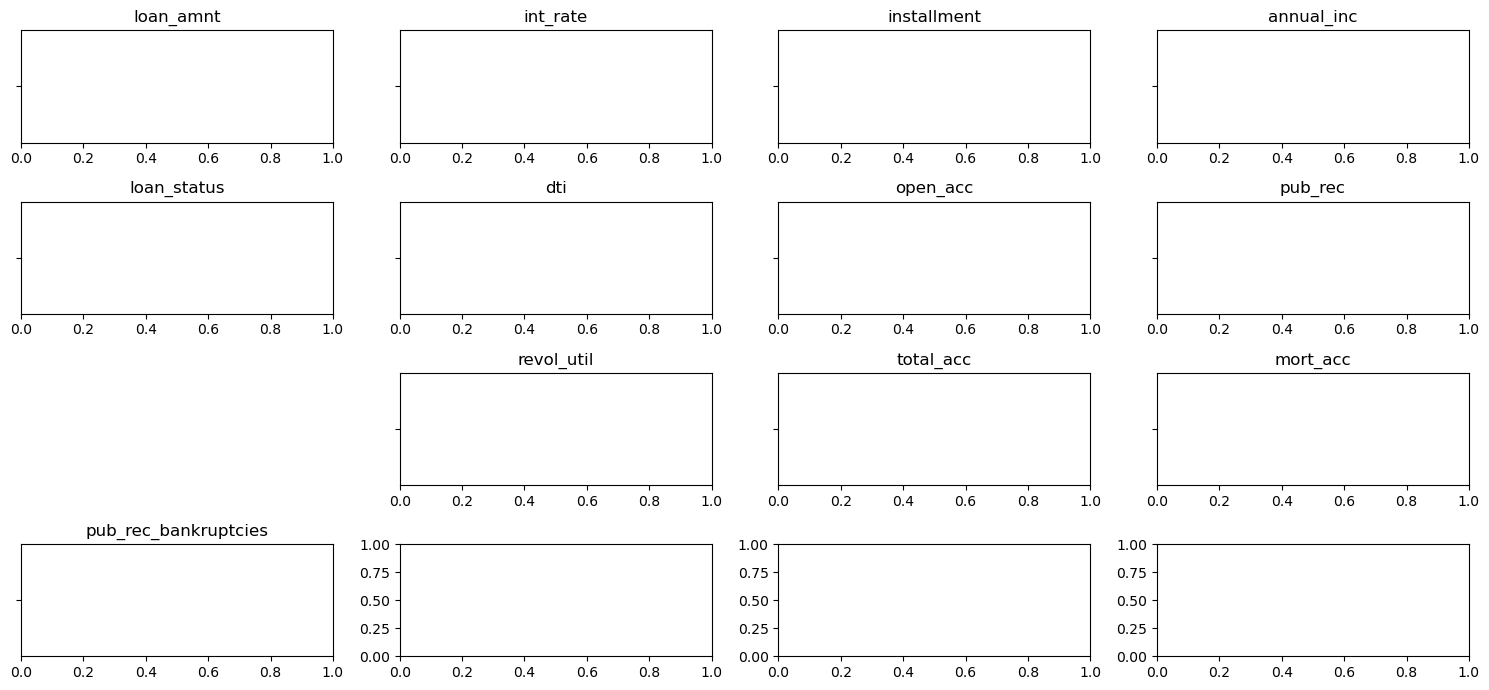

In [464]:
## Boxplot for numeric data

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 7), sharex = False, sharey = False)
axes = axes.ravel()  
cols = data_cleaned_iqr.select_dtypes(include=['float64', 'int64']).columns[:]

for col, ax in zip(cols, axes):
  d = data_cleaned_iqr.select_dtypes(include=['float64', 'int64'])
  #sns.boxplot(data=d, x=col, orient = "h", palette = "Set2", width=0.3, whis=[1, 99], ax=ax)
  sns.boxplot(data=d, x=col, orient = "h", palette = "Set2", width=0.3, ax=ax)
  ax.set(title=col, xlabel=None)

    
fig.delaxes(axes[8])
fig.tight_layout()
plt.show()

**Using Percentile** \
Better for all together or single variables?


In [465]:
data_cleaned_per = data_cleand

upper_limits_per = {}
lower_limits_per = {}

for col in num_col_list:

    print("\n", col, ":")

    upper_bound = data_cleand[col].quantile(0.99)  
    lower_bound = data_cleand[col].quantile(0.01)  

    print("99 percentile: ", upper_bound)
    print("01 percentile: ", lower_bound)  

    upper_limits_per[col] = upper_bound
    lower_limits_per[col] = lower_bound

for col in num_col_list:  
    #data_test_per = data_test_per[(data_test_per[col] > lower_limits_per[col]) & (data_test_per[col] < upper_limits_per[col])]
    data_cleaned_per = data_cleaned_per[(data_cleaned_per[col] < upper_limits_per[col])]

print("\n")
print("Old Shape: ", data_cleand.shape)
print("New Shape: ", data_cleaned_per.shape)

diff = len(data_cleand) - len(data_cleaned_per)
print("Size difference: ", diff)
data_cleaned_per


 loan_amnt :
99 percentile:  35000.0
01 percentile:  1600.0

 int_rate :
99 percentile:  25.28
01 percentile:  6.0

 installment :
99 percentile:  1202.3759999999916
01 percentile:  54.43

 annual_inc :
99 percentile:  250000.0
01 percentile:  19000.0

 dti :
99 percentile:  36.43
01 percentile:  1.56

 open_acc :
99 percentile:  27.0
01 percentile:  3.0

 pub_rec :
99 percentile:  2.0
01 percentile:  0.0

 revol_bal :
99 percentile:  86039.83999999939
01 percentile:  154.0

 revol_util :
99 percentile:  98.0
01 percentile:  1.02800000000002

 total_acc :
99 percentile:  60.0
01 percentile:  6.0

 mort_acc :
99 percentile:  8.0
01 percentile:  0.0

 pub_rec_bankruptcies :
99 percentile:  1.0
01 percentile:  0.0


Old Shape:  (396029, 20)
New Shape:  (308039, 20)
Size difference:  87990


,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000,36 months,11.44,329.48,10+ years,RENT,117000.00,Not Verified,0,vacation,26.24,16,0.00,36369.00,41.80,25,w,INDIVIDUAL,0.00,0.00
1,8000,36 months,11.99,265.68,4 years,MORTGAGE,65000.00,Not Verified,0,debt_consolidation,22.05,17,0.00,20131.00,53.30,27,f,INDIVIDUAL,3.00,0.00
2,15600,36 months,10.49,506.97,< 1 year,RENT,43057.00,Source Verified,0,credit_card,12.79,13,0.00,11987.00,92.20,26,f,INDIVIDUAL,0.00,0.00
3,7200,36 months,6.49,220.65,6 years,RENT,54000.00,Not Verified,0,credit_card,2.60,6,0.00,5472.00,21.50,13,f,INDIVIDUAL,0.00,0.00
4,24375,60 months,17.27,609.33,9 years,MORTGAGE,55000.00,Verified,1,credit_card,33.95,13,0.00,24584.00,69.80,43,f,INDIVIDUAL,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000,60 months,10.99,217.38,2 years,RENT,40000.00,Source Verified,0,debt_consolidation,15.63,6,0.00,1990.00,34.30,23,w,INDIVIDUAL,0.00,0.00
396026,21000,36 months,12.29,700.42,5 years,MORTGAGE,110000.00,Source Verified,0,debt_consolidation,21.45,6,0.00,43263.00,95.70,8,f,INDIVIDUAL,1.00,0.00
396027,5000,36 months,9.99,161.32,10+ years,RENT,56500.00,Verified,0,debt_consolidation,17.56,15,0.00,32704.00,66.90,23,f,INDIVIDUAL,0.00,0.00
396028,21000,60 months,15.31,503.02,10+ years,MORTGAGE,64000.00,Verified,0,debt_consolidation,15.88,9,0.00,15704.00,53.80,20,f,INDIVIDUAL,5.00,0.00


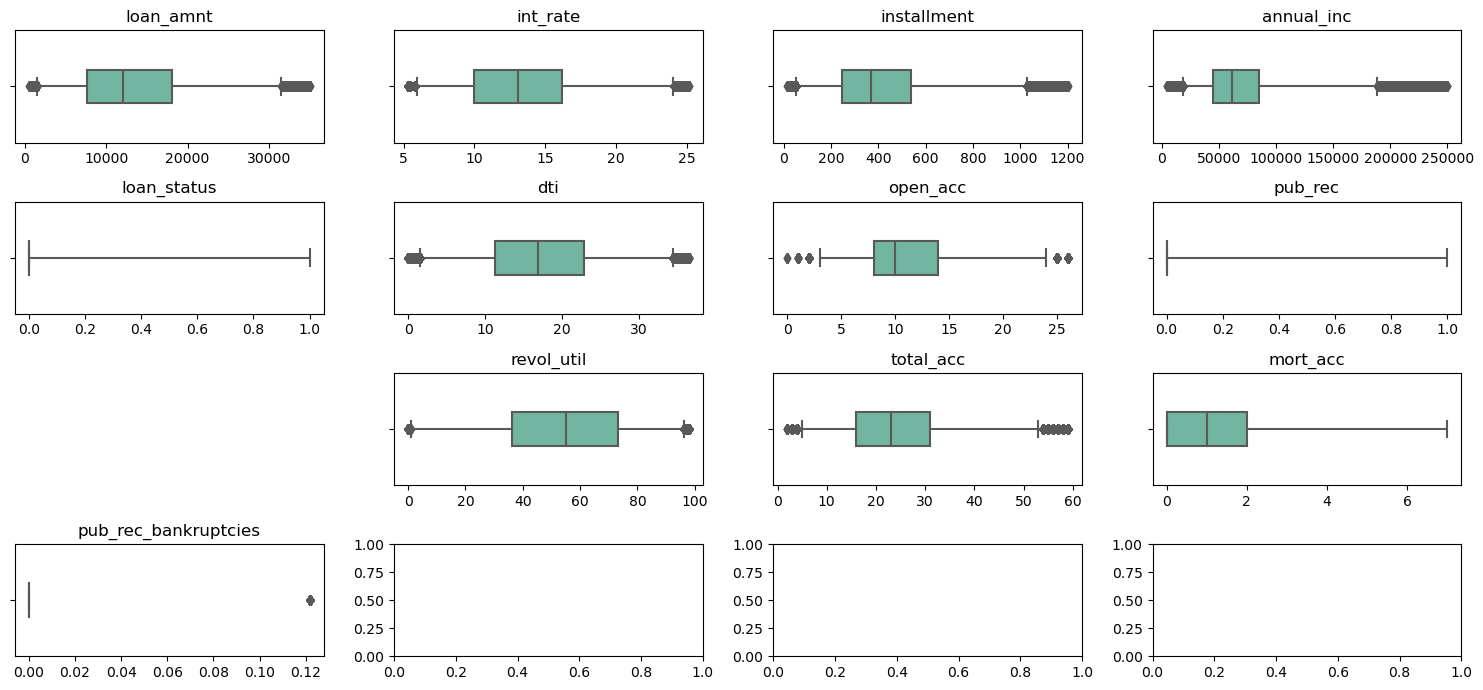

In [466]:
## Boxplot for numeric data

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 7), sharex = False, sharey = False)
axes = axes.ravel()  
cols = data_cleaned_per.select_dtypes(include=['float64', 'int64']).columns[:]

for col, ax in zip(cols, axes):
  d = data_cleaned_per.select_dtypes(include=['float64', 'int64'])
  sns.boxplot(data=d, x=col, orient = "h", palette = "Set2", width=0.3, whis=[1, 99], ax=ax)
  ax.set(title=col, xlabel=None)

    
fig.delaxes(axes[8])
fig.tight_layout()
plt.show()

C:\Users\Lorena Tassone\AppData\Local\Temp\ipykernel_29164\2349511280.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=d, x=col, shade=True, ax=ax)
C:\Users\Lorena Tassone\AppData\Local\Temp\ipykernel_29164\2349511280.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=d, x=col, shade=True, ax=ax)
C:\Users\Lorena Tassone\AppData\Local\Temp\ipykernel_29164\2349511280.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=d, x=col, shade=True, ax=ax)
C:\Users\Lorena Tassone\AppData\Local\Temp\ipykernel_29164\2349511280.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.


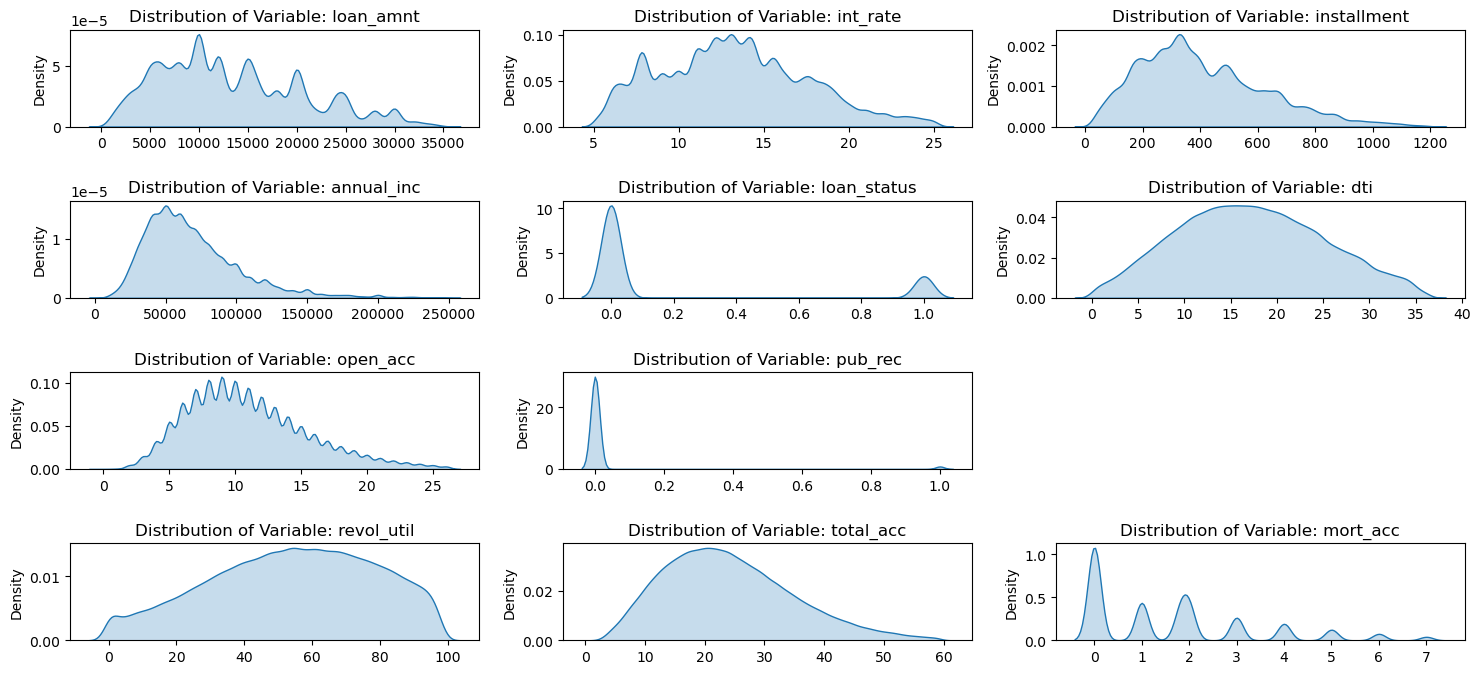

In [467]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 7), sharex = False, sharey = False)
axes = axes.ravel()  
cols = data_cleaned_per.select_dtypes(include=['float64', 'int64']).columns[:]

for col, ax in zip(cols, axes):
    d = data_cleaned_per.select_dtypes(include=['float64', 'int64'])
    sns.kdeplot(data=d, x=col, shade=True, ax=ax)
    ax.set(title=f'Distribution of Variable: {col}', xlabel=None)
    
fig.delaxes(axes[8])
fig.tight_layout()
plt.show()

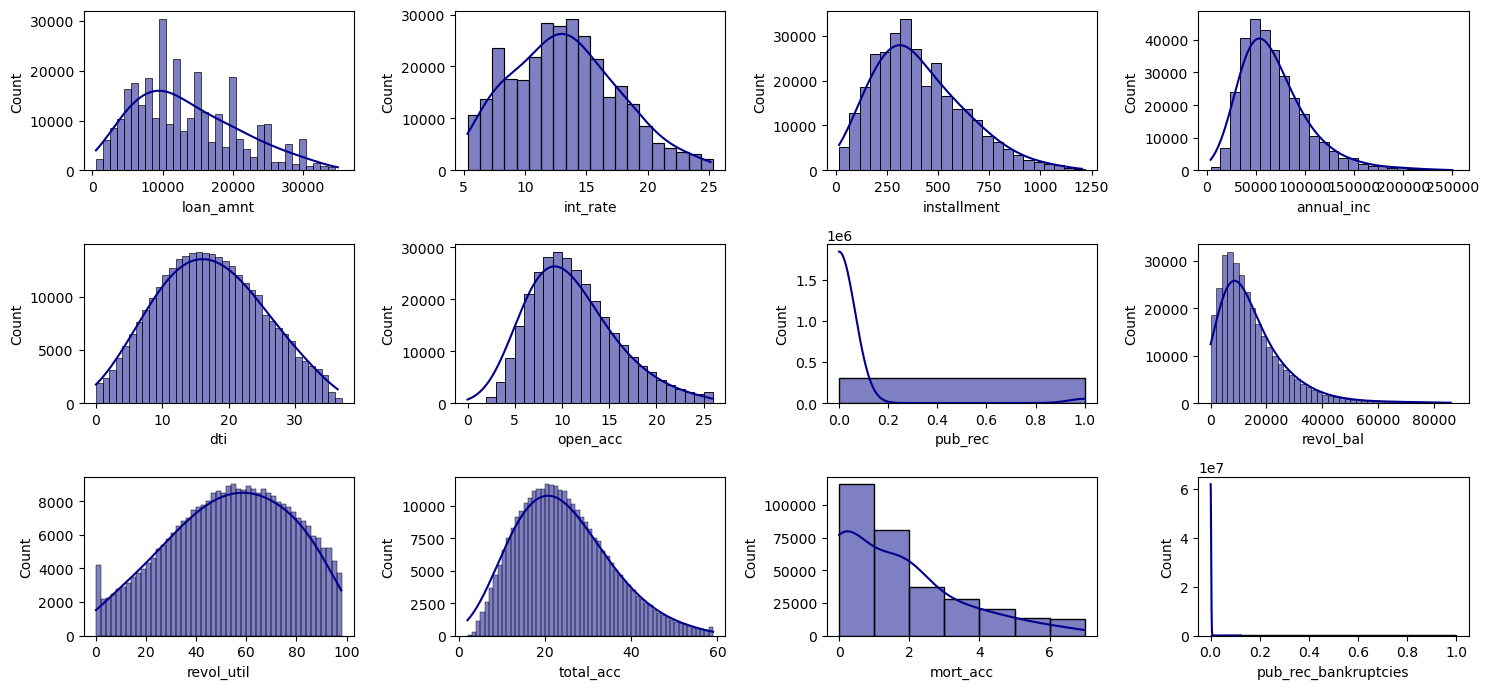

In [468]:
## Plotting Distribution for numeric data

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 7))

d = data_cleaned_per

# loan_amnt -> right/positive skewed
sns.histplot(data=d, x="loan_amnt", binwidth=1000, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[0,0])
# int_rate -> right/positive skewed
sns.histplot(data=d, x="int_rate", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[0,1])
# installment -> right/positive skewed
sns.histplot(data=d, x="installment", binwidth=50, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[0,2])
# annual_inc -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=d, x="annual_inc", binwidth=10000, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[0,3])
# dti -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=d, x="dti", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[1,0])
# open_acc -> right/positive skewed
sns.histplot(data=d, x="open_acc", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[1,1])
# pub_rec -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=d, x="pub_rec", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[1,2])
# revol_bal -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=d, x="revol_bal", binwidth=2000, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[1,3])
# revol_util -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=d, x="revol_util", binwidth=2, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[2,0])
# total_acc -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=d, x="total_acc", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[2,1])
# mort_acc -> right/positive skewed -> outlier -> re-do without
sns.histplot(data=d, x="mort_acc", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[2,2])
# pub_rec_bankruptcies
sns.histplot(data=d, x="pub_rec_bankruptcies", binwidth=1, color="darkblue", kde=True, kde_kws={'bw_method': 0.4}, ax=axs[2,3])

fig.tight_layout()
plt.show()

### Dealing with Categorical Data (TBD)
Create Dummies for categorical Data. \
-> OneHotEncoding: https://towardsdatascience.com/an-overview-of-categorical-input-handling-for-neural-networks-c172ba552dee

Problem because to many categories:
* emp_title -> ? (dropped)
* issue_d -> take only year? (dropped)
* earliest_cr_line -> take only year? (dropped)
* address -> ? (dropped)


**Categorical Data**
-> "Outliers"?

In [469]:
# emp_title -> ?
# issue_d -> take only year?
# earliest_cr_line -> take only year?
# address -> ?

# g = "address"

# c = data_cleand[g].value_counts().to_frame()
# c["pct"] =  c[g] / c[g].sum()*100
# c["cum_pct"] = c["pct"].cumsum()
# subset_c = c[c["cum_pct"] <= 50]
# display(subset_c)


KeyError: 'address'

OneHotEncoder

In [470]:
data_cleand = data_cleaned_win

In [471]:
# Separating numerical and categorical data
data_num_final = data_cleand.select_dtypes(include=['float64','int64'])
data_cat_final = data_cleand.select_dtypes(include=['object'])

In [472]:
# Categorical columns positions
cat_cols = data_cleand.select_dtypes(include=['object']).columns
cat_cols_list = cat_cols.to_list()
cat_col_positions = [data_cleand.columns.get_loc(col) for col in cat_cols]
display(cat_col_positions)
display(cat_cols_list)

[1, 4, 5, 7, 9, 16, 17]

['term',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type']

In [473]:
## One-hot-encoding of categorical columns

ohe = pp.OneHotEncoder()

transformer = make_column_transformer((ohe, cat_cols_list), remainder='passthrough')
transformed = transformer.fit_transform(data_cleand)
print(transformed.shape)
data_final = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
data_final

(396029, 54)


,onehotencoder__term_ 36 months,onehotencoder__term_ 60 months,onehotencoder__emp_length_1 year,onehotencoder__emp_length_10+ years,onehotencoder__emp_length_2 years,onehotencoder__emp_length_3 years,onehotencoder__emp_length_4 years,onehotencoder__emp_length_5 years,onehotencoder__emp_length_6 years,onehotencoder__emp_length_7 years,onehotencoder__emp_length_8 years,onehotencoder__emp_length_9 years,onehotencoder__emp_length_< 1 year,onehotencoder__home_ownership_ANY,onehotencoder__home_ownership_MORTGAGE,onehotencoder__home_ownership_NONE,onehotencoder__home_ownership_OTHER,onehotencoder__home_ownership_OWN,onehotencoder__home_ownership_RENT,onehotencoder__verification_status_Not Verified,onehotencoder__verification_status_Source Verified,onehotencoder__verification_status_Verified,onehotencoder__purpose_car,onehotencoder__purpose_credit_card,onehotencoder__purpose_debt_consolidation,onehotencoder__purpose_educational,onehotencoder__purpose_home_improvement,onehotencoder__purpose_house,onehotencoder__purpose_major_purchase,onehotencoder__purpose_medical,onehotencoder__purpose_moving,onehotencoder__purpose_other,onehotencoder__purpose_renewable_energy,onehotencoder__purpose_small_business,onehotencoder__purpose_vacation,onehotencoder__purpose_wedding,onehotencoder__initial_list_status_f,onehotencoder__initial_list_status_w,onehotencoder__application_type_DIRECT_PAY,onehotencoder__application_type_INDIVIDUAL,onehotencoder__application_type_JOINT,remainder__loan_amnt,remainder__int_rate,remainder__installment,remainder__annual_inc,remainder__loan_status,remainder__dti,remainder__open_acc,remainder__pub_rec,remainder__revol_bal,remainder__revol_util,remainder__total_acc,remainder__mort_acc,remainder__pub_rec_bankruptcies
0,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,10000.00,11.44,329.48,117000.00,0.00,26.24,16.00,0.00,36369.00,41.80,25.00,0.00,0.00
1,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,8000.00,11.99,265.68,65000.00,0.00,22.05,17.00,0.00,20131.00,53.30,27.00,3.00,0.00
2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,15600.00,10.49,506.97,43057.00,0.00,12.79,13.00,0.00,11987.00,92.20,26.00,0.00,0.00
3,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,7200.00,6.49,220.65,54000.00,0.00,2.60,6.00,0.00,5472.00,21.50,13.00,0.00,0.00
4,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,24375.00,17.27,609.33,55000.00,1.00,33.95,13.00,0.00,24584.00,69.80,43.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,10000.00,10.99,217.38,40000.00,0.00,15.63,6.00,0.00,1990.00,34.30,23.00,0.00,0.00
396025,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,21000.00,12.29,700.42,110000.00,0.00,21.45,6.00,0.00,43263.00,95.70,8.00,1.

### Data Normalization
Standardization, Normalization or Binning approach

In [474]:
# Should work once categorical variables one-hot-encoded

scaler = MinMaxScaler()
scaler.fit(data_final)
scaled = scaler.fit_transform(data_final)
data_final_scaled = pd.DataFrame(scaled, columns=data_final.columns)
data_final_scaled

,onehotencoder__term_ 36 months,onehotencoder__term_ 60 months,onehotencoder__emp_length_1 year,onehotencoder__emp_length_10+ years,onehotencoder__emp_length_2 years,onehotencoder__emp_length_3 years,onehotencoder__emp_length_4 years,onehotencoder__emp_length_5 years,onehotencoder__emp_length_6 years,onehotencoder__emp_length_7 years,onehotencoder__emp_length_8 years,onehotencoder__emp_length_9 years,onehotencoder__emp_length_< 1 year,onehotencoder__home_ownership_ANY,onehotencoder__home_ownership_MORTGAGE,onehotencoder__home_ownership_NONE,onehotencoder__home_ownership_OTHER,onehotencoder__home_ownership_OWN,onehotencoder__home_ownership_RENT,onehotencoder__verification_status_Not Verified,onehotencoder__verification_status_Source Verified,onehotencoder__verification_status_Verified,onehotencoder__purpose_car,onehotencoder__purpose_credit_card,onehotencoder__purpose_debt_consolidation,onehotencoder__purpose_educational,onehotencoder__purpose_home_improvement,onehotencoder__purpose_house,onehotencoder__purpose_major_purchase,onehotencoder__purpose_medical,onehotencoder__purpose_moving,onehotencoder__purpose_other,onehotencoder__purpose_renewable_energy,onehotencoder__purpose_small_business,onehotencoder__purpose_vacation,onehotencoder__purpose_wedding,onehotencoder__initial_list_status_f,onehotencoder__initial_list_status_w,onehotencoder__application_type_DIRECT_PAY,onehotencoder__application_type_INDIVIDUAL,onehotencoder__application_type_JOINT,remainder__loan_amnt,remainder__int_rate,remainder__installment,remainder__annual_inc,remainder__loan_status,remainder__dti,remainder__open_acc,remainder__pub_rec,remainder__revol_bal,remainder__revol_util,remainder__total_acc,remainder__mort_acc,remainder__pub_rec_bankruptcies
0,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.28,0.31,0.26,0.47,0.00,0.72,0.59,0.00,0.42,0.43,0.40,0.00,0.00
1,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.22,0.33,0.21,0.26,0.00,0.61,0.63,0.00,0.23,0.54,0.43,0.38,0.00
2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.44,0.26,0.41,0.17,0.00,0.35,0.48,0.00,0.14,0.94,0.41,0.00,0.00
3,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.19,0.06,0.17,0.22,0.00,0.07,0.22,0.00,0.06,0.22,0.19,0.00,0.00
4,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.69,0.60,0.50,0.22,1.00,0.93,0.48,0.00,0.29,0.71,0.71,0.12,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.28,0.28,0.17,0.16,0.00,0.43,0.22,0.00,0.02,0.35,0.36,0.00,0.00
396025,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.59,0.35,0.58,0.44,0.00,0.59,0.22,0.00,0.50,0.98,0.10,0.12,0.00
396026,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,

### Summary Statistics (final)

### Data Visualizations (final)
Final of used factors \
(for ppt)

In [ ]:
# sns.pairplot(data_cleand, hue="loan_status")

## Correlation Analysis Variables
Create correlation matrix

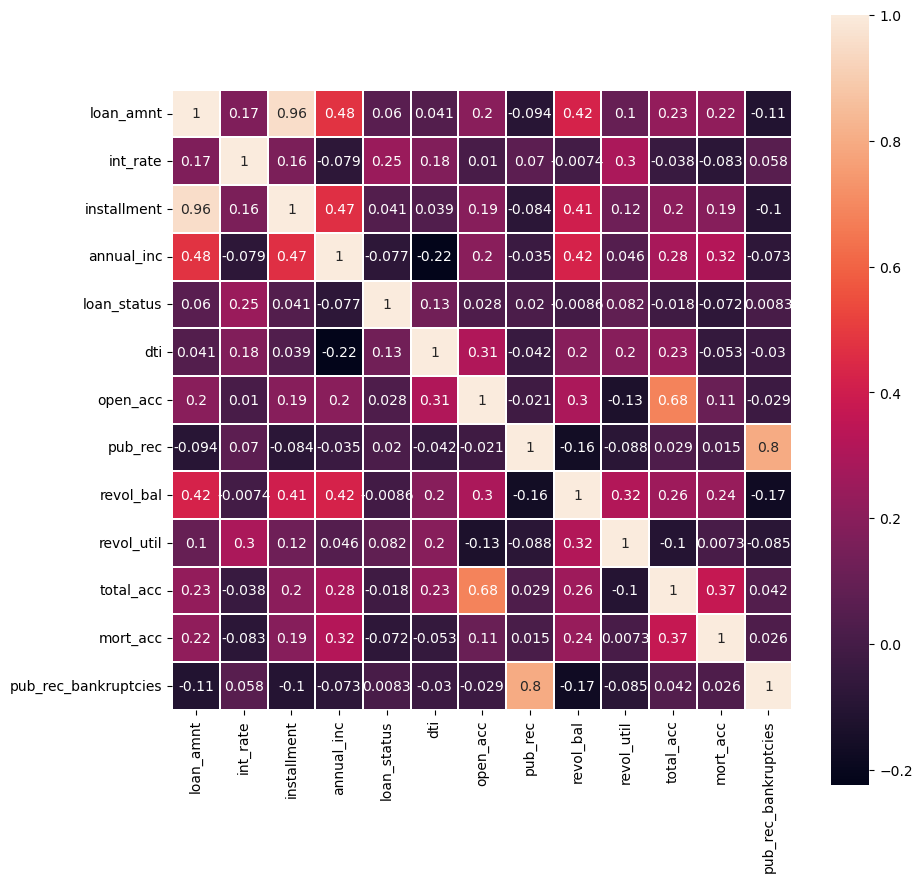

In [475]:
# only numeric variables
plt.figure(figsize=(10,10))
sns.heatmap(data_num_final.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

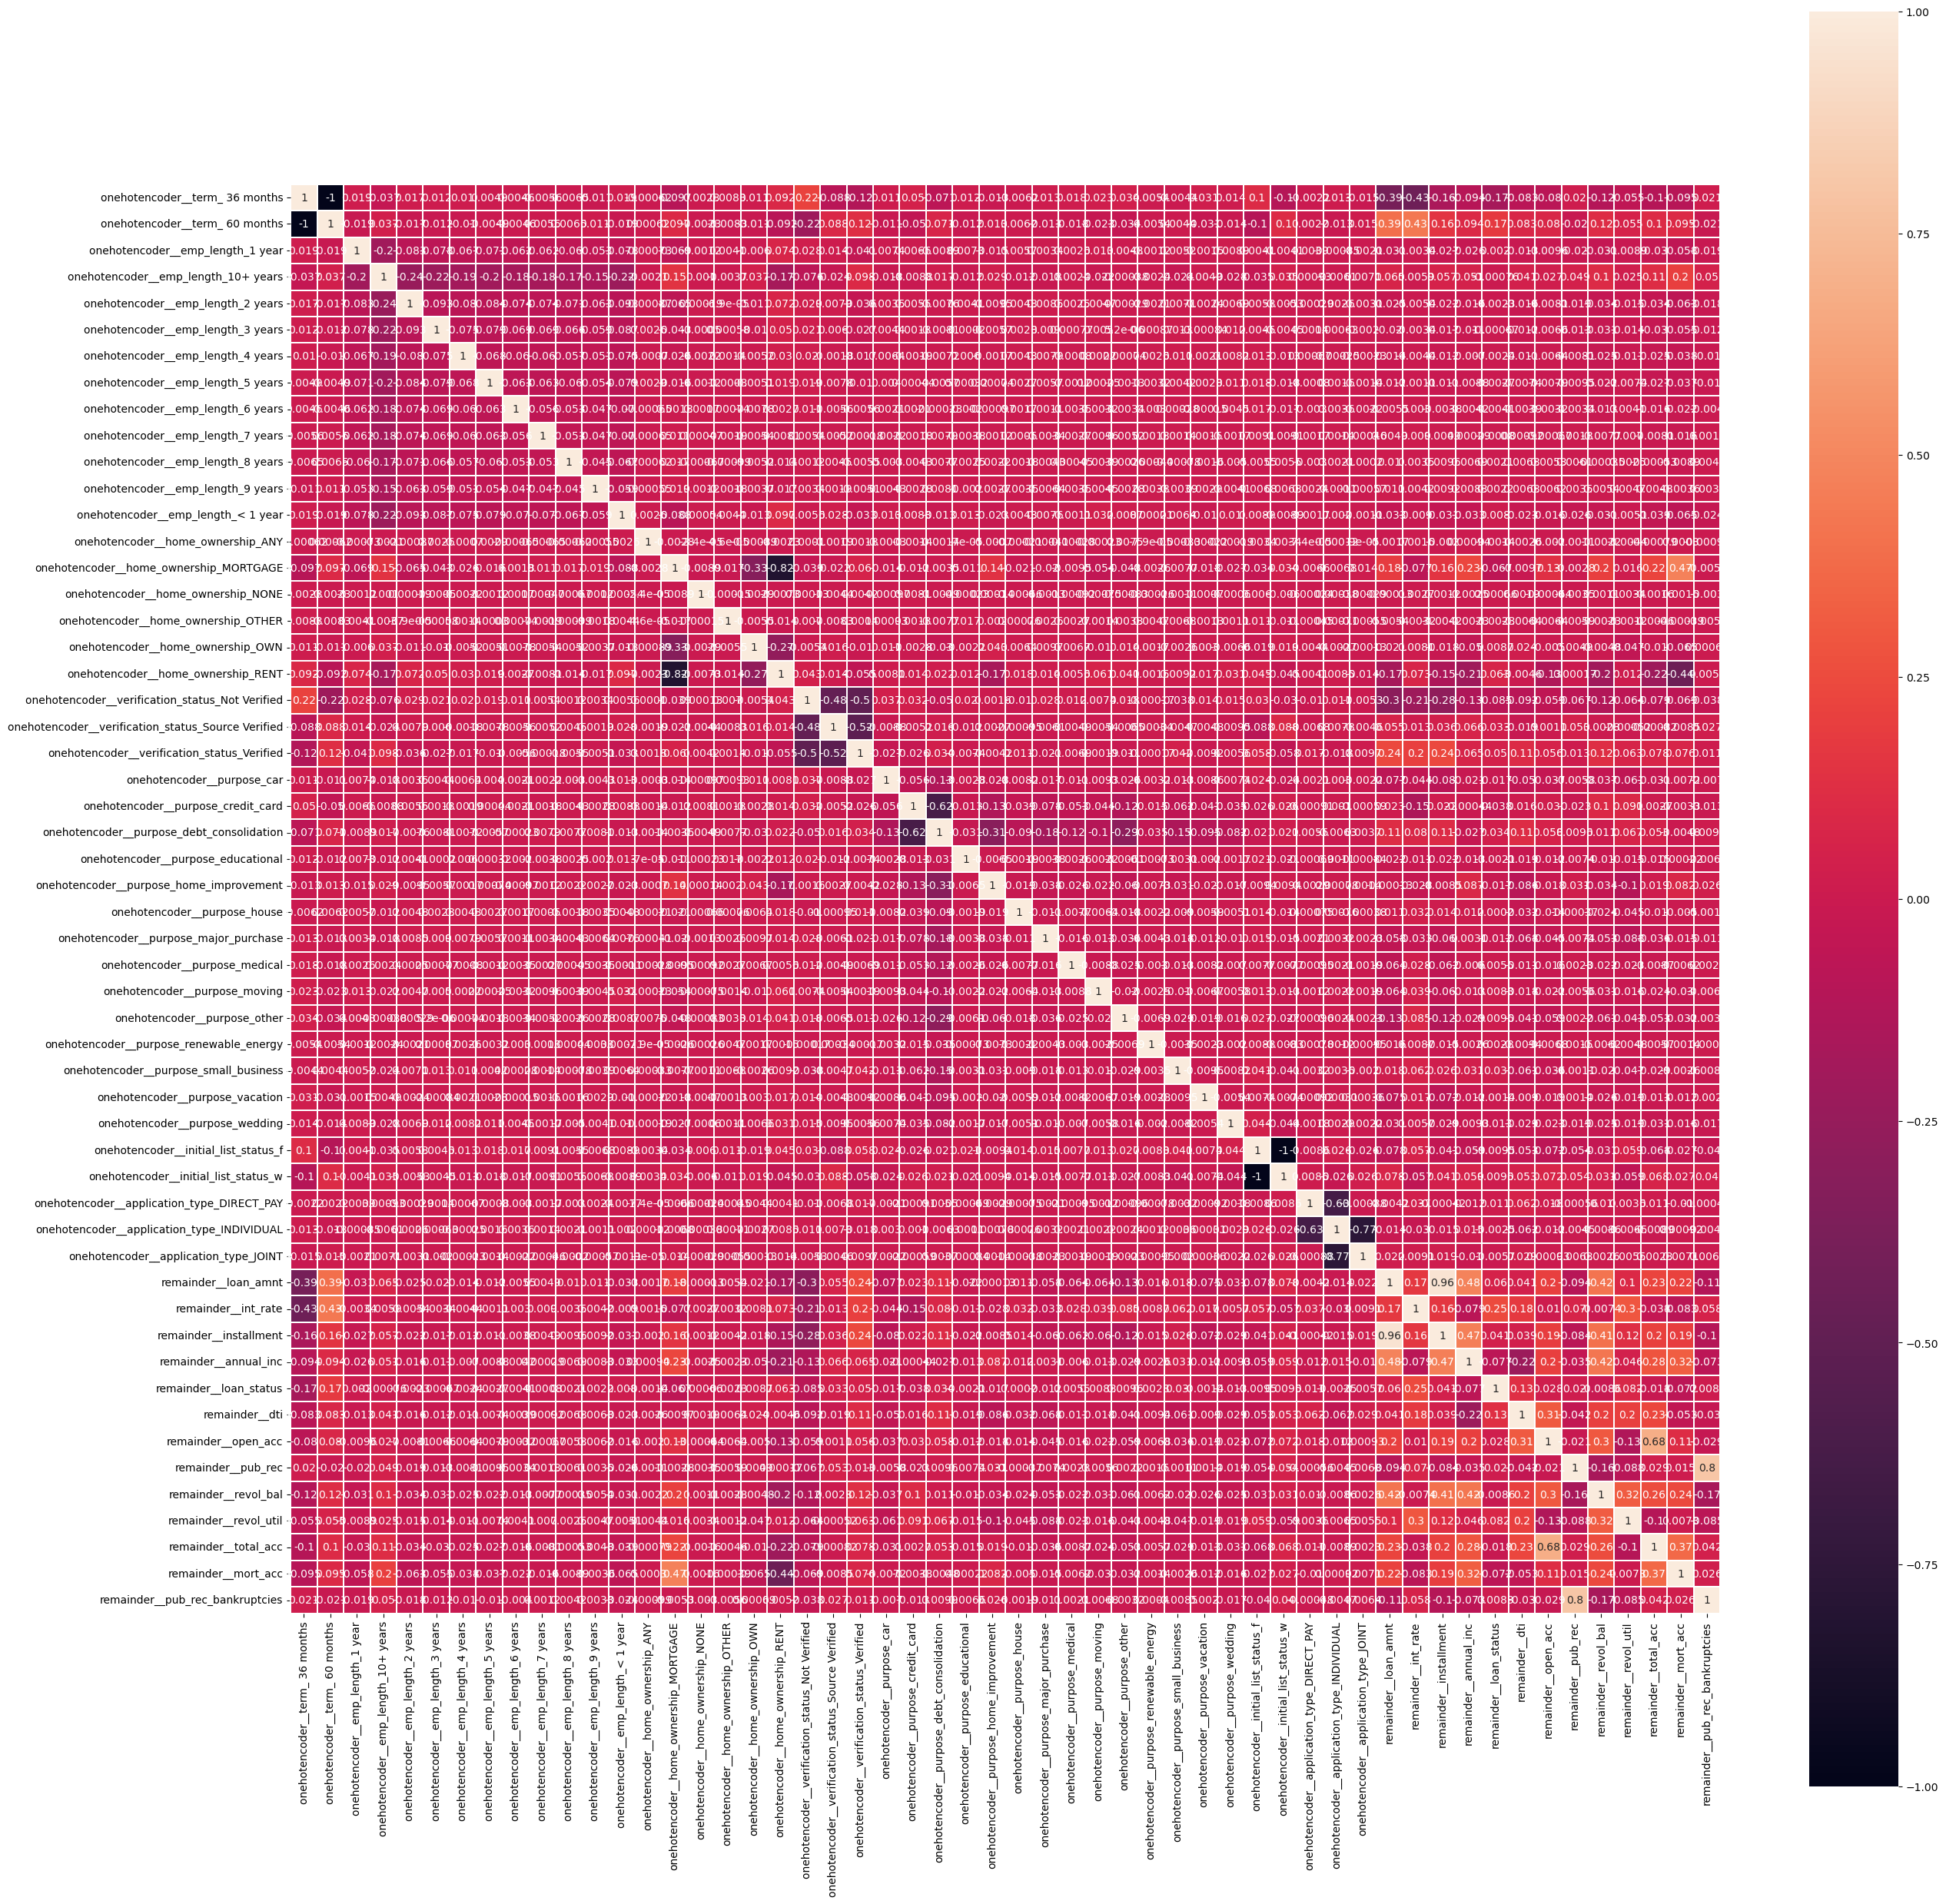

In [476]:
plt.figure(figsize=(30,30))
sns.heatmap(data_final.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()